# Practice3. Neural Network

In [ ]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import _pickle as pickle
import time

# set default plot options
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#Relu mask(X<=0)

## Set up input preprocessing

In [2]:
from utils import get_CIFAR10_data

In [3]:
X_tr, Y_tr, X_te, Y_te, mean_img = get_CIFAR10_data()
print ('Train data shape : %s,  Train labels shape : %s' % (X_tr.shape, Y_tr.shape))
print ('Test data shape : %s,  Test labels shape : %s' % (X_te.shape, Y_te.shape))

Train data shape : (10000, 3072),  Train labels shape : (10000,)
Test data shape : (1000, 3072),  Test labels shape : (1000,)


## Visualize training images

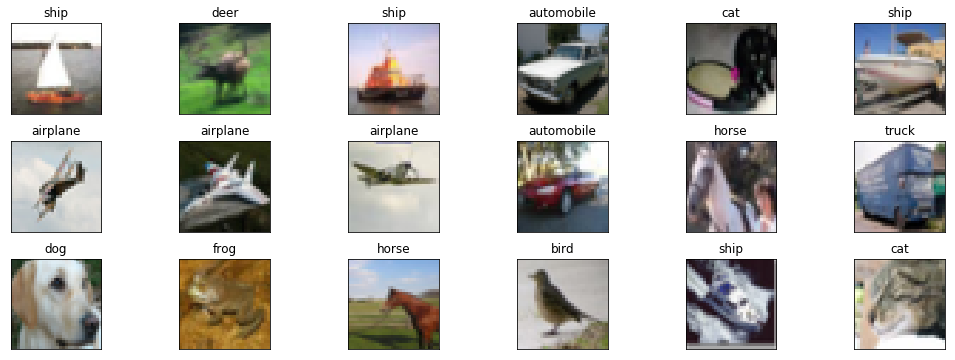

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

images_index = np.int32(np.round(np.random.rand(18,)*10000,0))

fig, axes = plt.subplots(3, 6, figsize=(18, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, idx in zip(axes.flat, images_index):
    img = (X_tr[idx,:3072].reshape(32, 32, 3) + mean_img.reshape(32, 32, 3))
    ax.imshow(img)
    ax.set_title(class_names[Y_tr[idx]])
    

# 1. Softmax function

In [5]:
def softmax(x):
    
    """
    Softmax 함수를 생성하라.
    NaN가 생성되지 않도록 구현 할 것(오버플로우 방지)
    Batch size(N)을 고려하여 구현하라
    
    Inputs : 
        - x : (N,D) 차원의 벡터
    
    Output : 
        - softmax_output : (N,D) 차원의 Softmax 결과
    
    """
    
    softmax_output = None
    
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#
    training_num, dim = x.shape
    #print('training_num',training_num, dim)
    
    #number stable
    x -= np.max(x, axis=1).reshape(training_num,1)
    softmax_output = np.exp(x)/np.sum(np.exp(x),axis=1).reshape(training_num,1)
    
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################
    
    return softmax_output


#### Softmax 구현 검증

In [6]:
temp_x = np.array([[2060,2000,2080]])
print (temp_x.shape)

(1, 3)


In [7]:
softmax_result1 = softmax(temp_x)
print (softmax_result1)

[[2.06115362e-09 1.80485138e-35 9.99999998e-01]]



    반드시 array([[2.06115362e-09, 1.80485138e-35, 9.99999998e-01]]) 과 유사한 결과를 얻어야 함

In [8]:
print (np.sum(softmax_result1))

0.9999999999999999


    반드시 0.9999999999999999 과 같은 결과를 얻어야 함

In [9]:
temp_x = np.array([[2060,2000,2080],[1010,1020,1030]])
print (temp_x.shape)

(2, 3)


In [10]:
softmax_result2 = softmax(temp_x)
print (softmax_result2)

[[2.06115362e-09 1.80485138e-35 9.99999998e-01]
 [2.06106005e-09 4.53978686e-05 9.99954600e-01]]


    반드시 array([[2.06115362e-09, 1.80485138e-35, 9.99999998e-01],  
                [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]]) 과 유사한 결과를 얻어야 함.

In [11]:
print (np.sum(softmax_result2, axis=1))

[1. 1.]


    반드시 [1. 1.] 과 같은 결과를 얻어야 함.

# 2. Cross-Entropy Loss

In [12]:

def cross_entropy_loss(softmax_output, target, weights, regularization):
    
    """
    cross_entropy_loss 함수를 생성하라.
    delta를 이용하여 log값의 input으로 0이 들어가지 않도록 대처하라
    Batch size(N)을 고려하여 구현하라.
    Weights를 이용한 L2 Regularization을 고려하여 구현하라
    L2 Regularization은 0.5를 곱하여 계산하라 (미분 할 때 계산적 이점)
    
    Inputs : 
        - softmax_output : Softmax의 결과로 넘어오는 (N, D) 차원의 벡터
        - target : (N, # of labels) 차원의 벡터 (One-hot encoding)
        - weights : NN 모델에 존재하는 모든 Weight 값(Dictionary 형태)
        - regularization : regularization를 결정하는 0과 1사이의 수
    
    Output : 
        - loss : scalar인 loss 값
    """
    
    delta = 1e-9
    batch_size = target.shape[0]
    data_loss = 0
    reg_loss = 0
    loss = None
    
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#

    data_loss = -np.sum(np.log(softmax_output[range(batch_size), np.argmax(target, axis=1)] + delta))
    
    
    #Regularization
    data_loss /= batch_size
    
    sum_w = 0.0
    for w in (weights.values()):
        sum_w += np.sum(w*w)
    
    reg_loss += 0.5*regularization*sum_w
    
    
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################
    
    loss = data_loss + reg_loss
    
    return loss

#### cross entropy loss 구현 검증

In [13]:
temp_score0 = np.array([[0.0, 0.0, 0.0]])
temp_target0 = np.array([[0,1,0]])
print (temp_score0.shape)
print (temp_target0.shape)


(1, 3)
(1, 3)


In [14]:
temp_weight1 = np.array([[0.1,0.2,0.3],[-0.5,0.3,-0.8]])
temp_weight2 = np.array([[0.9,-0.5,0.3],[0.9,0.6,-0.8]])

weights = {}
weights['W1'] = (temp_weight1)
weights['W2'] = (temp_weight2)

for w in (weights.values()):
        print(w)


reg_term = 0.001

[[ 0.1  0.2  0.3]
 [-0.5  0.3 -0.8]]
[[ 0.9 -0.5  0.3]
 [ 0.9  0.6 -0.8]]


In [15]:
cross_entropy_loss(temp_score0, temp_target0, weights, reg_term)

20.72530583694641

    반드시 20.72530583694641 과 유사한 결과를 얻어야 함. (NaN이 나오면 안됨)

In [16]:
temp_score1 = np.array([[0.1, 0.3, 0.6]])
temp_target1 = np.array([[0,1,0]])
print (temp_score1.shape)
print (temp_target1.shape)

(1, 3)
(1, 3)


In [17]:
cross_entropy_loss(temp_score1, temp_target1 , weights, reg_term)

1.2060128009926026

    반드시 1.2060128009926026 과 유사한 결과를 얻어야 함.

In [18]:
temp_score2 = np.array([[0.1, 0.3, 0.6],[0.2,0.4,0.4],[0.9,0.05,0.05]])
temp_target2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
print (temp_score2.shape)
print (temp_target2.shape)


(3, 3)
(3, 3)


In [19]:
cross_entropy_loss(temp_score2, temp_target2 , weights, 0.001)

0.7439146816378241

    반드시 0.7439146816378243 과 유사한 결과를 얻어야 함.

# 2. Output Layer

In [20]:

class OutputLayer:
    
    """
    Softmax를 이용한 Cross-entropy loss를 계산하는 Ouput Layer class를 생성하라.
    앞서 생성한 softmax() 및 cross_entropy_loss를 이용하여 구현 할 것
    forward, backward의 계산과정을 생각하여 구현할 것
    backpropagation에서 softmax의 output과 target label의 정보가 이용됨을 유념하여 구현할 것
    
    forward() : 
        - x : Forward propagation 과정에서 이전 레이어로부터 넘어오는 (N,D) 차원의 벡터
        - y : (N, # of Label) 차원의 벡터 
        - return : softmax loss
    
    backward() : 
        - dout : backpropagation 과정에서 이전 레이어로부터 넘어오는 오는 delta 값, output layer 이므로 delta = 1
        - return : dx

    """
    
    def __init__(self, weights, regularization):
        self.loss = None           # loss value
        self.output_softmax = None # Output of softmax
        self.target_label = None   # Target label (one-hot vector)
        self.weights = weights
        self.regularization = regularization
        
    def forward(self, x, y):
    
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        self.output_softmax = softmax(x)
        self.target_label = y
        self.loss = cross_entropy_loss(self.output_softmax,self.target_label,self.weights,self.regularization)
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        #print('output_softmax',self.output_softmax)
        return self.loss
    
    def backward(self, dout=1):
        
        bt_size = self.target_label.shape[0]
        dx = None
        
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        #print(self.output_softmax)
        #print(self.target_label)
        dx = dout * (self.output_softmax-self.target_label) / bt_size
        
        #dx = self.output_softmax
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        
        return dx

In [21]:
outputlayer = OutputLayer(weights, reg_term)

In [22]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_t1 = np.array([[0,1,0]])
print (temp_x1.shape)
print (temp_t1.shape)

(1, 3)
(1, 3)


In [23]:
outputlayer.forward(temp_x1, temp_t1)

13.097100867144416

    반드시 13.097100867144416 값과 같은 결과를 얻어야 함

In [24]:
outputlayer.backward()

array([[ 0.90887517, -0.99999795,  0.09112277]])

    반드시 array([[ 0.90887517, -0.99999795,  0.09112277]]) 값과 유사한 결과를 얻어야 함

In [25]:
temp_x2 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_t2 = np.array([[0,1,0],[1,0,0],[0,0,1]])
print (temp_x2.shape)
print (temp_t2.shape)

(3, 3)
(3, 3)


In [26]:
outputlayer.forward(temp_x2, temp_t2)

7.077588386844261

    반드시 7.077588386844261 값과 유사한 결과를 얻어야 함

In [27]:
outputlayer.backward()

array([[ 3.02958391e-01, -3.33332649e-01,  3.03742579e-02],
       [-3.32509126e-01,  3.32509088e-01,  3.74189683e-08],
       [ 7.26173786e-04,  2.92959414e-01, -2.93685588e-01]])

    반드시 array([[ 3.02958391e-01, -3.33332649e-01,  3.03742579e-02],  
                 [-3.32509126e-01,  3.32509088e-01,  3.74189683e-08],  
                 [ 7.26173786e-04,  2.92959414e-01, -2.93685588e-01]]) 값과 유사한 결과를 얻어야 함.

# 3. ReLU

In [28]:
class ReLU:
    
    """
    ReLU를 구현하라
    forward, backward의 계산과정을 생각하여 구현할 것
    backpropagation에서 forward 과정에서 사용 된 mask 정보가 사용됨을 유념하여 구현할 것
    
    forward() : 
        - x : Forward propagation 과정에서 이전 레이어로부터 넘어오는 (N,D) 차원의 벡터
        - return : ReLU output
    
    backward() : 
        - dout : backpropagation 과정에서 이전 레이어로부터 넘어오는 오는 delta 값
        - return : dx
    
    """
    
    def __init__(self):
        
        self.mask = None
        
    def forward(self, x):
        
        self.out = None
    
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        
        #Relu mask(X<=0)
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
    
        return out
    
    def backward(self, dout):
        
        dx = None
        dout[self.mask] = 0
        dx = dout
        
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#

        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        
        return dx

In [29]:
relu = ReLU()

In [30]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_x2 = np.array([[-10,1,0]])
print (temp_x1.shape)
print (temp_x2.shape)

(1, 3)
(1, 3)


In [31]:
relu.forward(temp_x1)

array([[3. , 0. , 0.7]])

    반드시 array([[3. , 0. , 0.7]]) 값과 같은 결과를 얻어야 함

In [32]:
relu.backward(temp_x2)

array([[-10,   0,   0]])

    반드시 array([[-10,   0,   0]]) 값과 같은 결과를 얻어야 함

In [33]:
temp_x3 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_x4 = np.array([[3,5,-10],[5,-4,2],[-3,-5,3]])
print (temp_x3.shape)
print (temp_x4.shape)

(3, 3)
(3, 3)


In [34]:
relu.forward(temp_x3)

array([[ 3. ,  0. ,  0.7],
       [ 9. , 15. ,  0. ],
       [ 0. ,  1. ,  0. ]])

    반드시 array([[ 3. ,  0. ,  0.7],
                 [ 9. , 15. ,  0. ],
                 [ 0. ,  1. ,  0. ]]) 값과 같은 결과를 얻어야 함

In [35]:
relu.backward(temp_x4)

array([[  3,   0, -10],
       [  5,  -4,   0],
       [  0,  -5,   0]])

    반드시 array([[  3,   0, -10],
                 [  5,  -4,   0],
                 [  0,  -5,   0]]) 값과 같은 결과를 얻어야 함

# 4. Sigmoid

In [36]:
class Sigmoid:
    
    """
    Sigmoid 구현하라
    forward, backward의 계산과정을 생각하여 구현할 것
    backpropagation 과정에서 forward 과정에서 나온 계산 결과가 사용됨을 유념하여 구현할 것
    
    forward() : 
        - x : Forward propagation 과정에서 이전 레이어로부터 넘어오는 (N,D) 차원의 벡터
        - return : Sigmoid output
    
    backward() : 
        - dout : backpropagation 과정에서 이전 레이어로부터 넘어오는 오는 delta 값
        - return : dx
    
    """
    
    def __init__(self):
        self.out = None
        
    def forward(self, x):
    
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        
        self.out = 1 / (1 + np.exp(-x))
        
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
    
        return self.out
    
    def backward(self, dout):
        
        dx = None
        
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        dx = dout * self.out * (1 - self.out)
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        
        return dx

In [37]:
sigmoid = Sigmoid()

In [38]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_t1 = np.array([[0,1,0]])
print (temp_x1.shape)
print (temp_t1.shape)

(1, 3)
(1, 3)


In [39]:
sigmoid.forward(temp_x1)

array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01]])

    반드시 array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01]]) 값과 유사한 결과를 얻어야 함 

In [40]:
sigmoid.backward(temp_x1)

array([[ 0.13552998, -0.00045396,  0.15519901]])

    반드시 array([[ 0.13552998, -0.00045396,  0.15519901]]) 값과 유사한 결과를 얻어야 함

In [41]:
temp_x2 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_t2 = np.array([[0,1,0],[1,0,0],[0,0,1]])
print (temp_x2.shape)
print (temp_t2.shape)

(3, 3)
(3, 3)


In [42]:
sigmoid.forward(temp_x2)

array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01],
       [9.99876605e-01, 9.99999694e-01, 2.68941421e-01],
       [6.69285092e-03, 7.31058579e-01, 2.68941421e-01]])

    반드시 array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01],  
                 [9.99876605e-01, 9.99999694e-01, 2.68941421e-01],  
                 [6.69285092e-03, 7.31058579e-01, 2.68941421e-01]]) 값과 유사한 결과를 얻어야 함         

In [43]:
sigmoid.backward(temp_x2)

array([[ 1.35529979e-01, -4.53958077e-04,  1.55199011e-01],
       [ 1.11041415e-03,  4.58853200e-06, -1.96611933e-01],
       [-3.32402834e-02,  1.96611933e-01, -1.96611933e-01]])

    반드시 array([[ 1.35529979e-01, -4.53958077e-04,  1.55199011e-01],  
                 [ 1.11041415e-03,  4.58853200e-06, -1.96611933e-01],  
                 [-3.32402834e-02,  1.96611933e-01, -1.96611933e-01]]) 값과 유사한 결과를 얻어야 함

# 5. Affine

In [44]:
class Affine:
    
    """
    Affine 계층을 구현하라
    Affine 계층이란 Y = np.dot(X, W) + B (X는 입력, W는 가중치, B는 바이어스)와 같은 한 뉴런의 가중치합을 계산하는 것
    forward, backward의 계산과정을 생각하여 구현할 것
    Batch size(N)을 고려하여 구현할 것
    Backward 과정에서 W,b 그리고 x 까지 모두 사용됨을 유의하여 구현할 것
    
    forward() : 
        - x : Forward propagation 과정에서 이전 레이어로부터 넘어오는 (N,D) 차원의 벡터
        - return : Affine output
    
    backward() : 
        - dout : backpropagation 과정에서 이전 레이어로부터 넘어오는 오는 delta 값
        - return : dx
    
    """
    
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        
        self.x = x
        
        out = None
        
        out = np.dot(self.x, self.W) + self.b
    
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#

        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
    
        return out
    
    def backward(self, dout):
        
        dx = None
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        self.db = 1
        dx = np.dot(dout,self.W.T)
        self.dW = np.dot(self.x.T,dout)
        self.db = dout.sum(axis=0)
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        
        return dx

In [45]:
temp_W = np.array([[0.2, -0.3, 0.6], [-0.9, 0.1, -0.4]])
temp_b = np.array([[0.2, -0.3, 0.6]])
print (temp_W.shape)
print (temp_b.shape)

(2, 3)
(1, 3)


In [46]:
temp_x = np.array([[0.2, -0.3], [-0.9, 0.1]])
print (temp_x.shape)

(2, 2)


In [47]:
affine = Affine(temp_W, temp_b)

In [48]:
affine.forward(temp_x)

array([[ 0.51, -0.39,  0.84],
       [-0.07, -0.02,  0.02]])

    반드시 array([[ 0.51, -0.39,  0.84],  
                 [-0.07, -0.02,  0.02]]) 값과 같은 결과를 얻어야 함

In [49]:
temp_t = np.array([[0.1, 0.5, -0.8], [0.4, 0.7, -0.2]])
affine.backward(temp_t)

array([[-0.61,  0.28],
       [-0.25, -0.21]])

    반드시 array([[-0.61,  0.28],
                  [-0.25, -0.21]]) 값과 같은 결과를 얻어야 함

In [50]:
affine.dW

array([[-0.34, -0.53,  0.02],
       [ 0.01, -0.08,  0.22]])

    반드시 array([[-0.34, -0.53,  0.02],
                  [ 0.01, -0.08,  0.22]]) 값과 같은 결과를 얻어야 함

In [51]:
affine.db

array([ 0.5,  1.2, -1. ])

    반드시 array([ 0.5,  1.2, -1. ]) 값과 같은 결과를 얻어야 함

# 6. TwoLayerNN

### 1) TwoLayerNet 구현하기

In [ ]:
from collections import OrderedDict
from utils import numerical_gradient
class TwoLayerNet:
    
    """

    __init__() : 
        - Weight 및 bias를 initialization 하는 함수
        - Initialization 된 Weight와 bias를 이용하여 계층을 생성하는 함수
    
    predict() : 
        - Input data(x)에 대해서 Neural network의 forward propagtion을 수행하는 함수
        
    loss() : 
        - Input data(x)에 대해서 Neural network의 forward propagtion을 수행한 결과를 이용하여 Loss를 계산하는 함수
        
    accuracy() :
        - Input data(x)의 결과와 True label(y)을 이용하여 Accuracy를 구하는 함수
        
    numerical_gradient() :
        - Input data(x)와 True label(y)을 이용하여 Numerical_gradient를 구하는 함수
        - Backpropagation 방법과의 비교를 위해 사용
        
    gradient():
        - Input data(x)와 True label(y)을 이용하여 Backpropagation을 수행하는 함수

    """

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01, regularization = 0.0):

        # 가중치 초기화
        # Weight initialization
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.weights = {}
        self.weights['W1'] = self.params['W1']
        self.weights['W2'] = self.params['W2']
        
        self.reg = regularization

        # 계층 생성
        # Layer generation
        self.layers = OrderedDict() # infromation about OrderedDict (https://pymotw.com/2/collections/ordereddict.html)
        
        #########################################################################################################
        # TwoLayerNet을 구현하라                                                                                 
        # Neural Network의 구조는 다음과 같이 구현할 것                                                           
        # [ Input => Fully Connected => ReLU => Fully Connected(OutputLayer) ]
        # 구현시 위 과정에서 생성한 Class(Affine, ReLU)들 및 Weight initialization 과정에서 생성한 weight를 이용하여 구현할 것
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        self.lastLayer = OutputLayer(self.weights, self.reg)

    def predict(self, x):

        for layer in self.layers.values():
            x = layer.forward(x)
            print(x)
            
        return x

    def loss(self, x, y):
        score = self.predict(x)
        return self.lastLayer.forward(score, y)

    

    def accuracy(self, x, y):

        score = self.predict(x)
        score = np.argmax(score, axis=1)
        if y.ndim != 1 : y = np.argmax(y, axis=1)
        accuracy = np.sum(score == y) / float(x.shape[0])

        return accuracy

    def numerical_gradient(self, x, y):

        loss_W = lambda W: self.loss(x, y)
        print('numerical_gradient start')
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        print('numerical_gradient end')
            
        return grads

        

    def gradient(self, x, y):

        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        
        if self.reg != 0.0:
            
            #########################################################################################################
            # 각 Weight 및 bias의 Gradient를 구할 때 Regularization에 의한 영향을 구현하라
            #########################################################################################################
            #------------------------------------------WRITE YOUR CODE----------------------------------------------#
            
            grads['W1'] += self.reg * self.weights['W1']
            grads['W2'] += self.reg * self.weights['W2']
            
            #tr_length = x.shape[0]
            #print('tr_length',tr_length)
            #for dw,w in zip(grads.values(),weights.values()):
                #print(dw)
                #dw['W1'] = dw['W1'] + self.reg * w['W1'] 
                #dw['W2'] = dw['W2'] + self.reg * w['W2']
                #dWeights = (1.0/tr_length)*dWeights + reg*Weights
            #-----------------------------------------END OF YOUR CODE----------------------------------------------#
            #########################################################################################################

        return grads

In [ ]:
 X_tr[:3].shape

### 2) Numerical gradient vs Backpropagation

In [68]:
import time

network = TwoLayerNet(input_size=3072, hidden_size=1024, output_size=10, regularization = 0.0001)

x_batch = X_tr[:3]
t_batch = Y_tr[:3]

nb_classes = 10

targets = t_batch.reshape(-1)
t_batch = np.eye(nb_classes)[targets]

start_time = time.time() 
grad_backprop = network.gradient(x_batch, t_batch)
print("[grad_backprop] running time(sec) : " +str(time.time() - start_time))

start_time = time.time() 
grad_numerical = network.numerical_gradient(x_batch, t_batch)
print("[grad_numerical] running time(sec) : "+str(time.time() - start_time))

print ()

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[grad_backprop] running time(sec) : 0.03307390213012695
numerical_gradient start
[[ 0.0897508   0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753717  0.00222002  0.00405557  0.04518185 -0.0266435   0.00159784
   0.00869899 -0.02581317  0.00451378 -0.01199924]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789162  0.03142802 -0.05034334  0.00505983 -0.02489292 -0.00072128
  -0.00697572 -0.04910985  0.01102375 -0.03851588]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592144  0.03385243 -0.03711377  0.0670845   0.05157242 -0.0063718
   0.05346357  0.02714508  0.00363777 -0.05562868]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753728  0.00221981  0.00405528  0.04518178 -0.02664363  0.0015979
   0.00869898 -0.02581325  0.00451372 -0.01199917]
 [ 0.05592146  0.03385134 -0.03711432  0.067085    0.0515718  -0.00637148
   0.05346366  0.0271464   0.0036375  -0.05562963]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789171  0.03142859 -0.05034364  0.00506    -0.02489337 -0.00072143
  -0.00697597 -0.04911061  0.01102336 -0.0385158 ]
 [-0.01753726  0.00221983  0.00405547  0.04518164 -0.02664338  0.00159789
   0.00869904 -0.02581326  0.00451389 -0.01199902]
 [ 0.05592159  0.03385147 -0.03711326  0.06708422  0.05157318 -0.00637155
   0.053464    0.02714635  0.00363843 -0.05562881]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278915   0.03142822 -0.0503438   0.00505965 -0.02489292 -0.00072146
  -0.00697561 -0.04911024  0.01102359 -0.03851516]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753729  0.00221986  0.00405553  0.04518183 -0.02664374  0.00159781
   0.00869895 -0.02581325  0.00451378 -0.01199902]
 [ 0.05592143  0.03385162 -0.0371129   0.06708527  0.05157116 -0.00637197
   0.0534635   0.02714644  0.00363779 -0.05562876]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789152  0.03142865 -0.05034305  0.00505937 -0.02489256 -0.00072157
  -0.00697556 -0.04911052  0.01102345 -0.0385157 ]
 [-0.01753731  0.00221981  0.00405529  0.04518183 -0.02664363  0.00159793
   0.00869892 -0.02581329  0.00451386 -0.01199905]
 [ 0.05592128  0.03385136 -0.03711425  0.06708528  0.05157181 -0.00637131
   0.05346331  0.02714621  0.00363827 -0.05562898]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278915   0.03142856 -0.05034381  0.00505935 -0.02489288 -0.0007213
  -0.00697525 -0.04911097  0.01102353 -0.03851568]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.0559212   0.03385157 -0.03711306  0.06708518  0.05157203 -0.00637153
   0.05346403  0.02714604  0.0036371  -0.05562925]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789163  0.03142832 -0.0503434   0.00505956 -0.02489232 -0.0007218
  -0.00697551 -0.04911055  0.01102345 -0.03851578]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789183  0.03142796 -0.05034338  0.00506008 -0.02489312 -0.00072166
  -0.0069757  -0.0491105   0.01102331 -0.03851657]
 [-0.01753722  0.00222002  0.00405539  0.04518162 -0.02664346  0.00159796
   0.00869896 -0.0258133   0.00451391 -0.01199879]
 [ 0.05592179  0.03385252 -0.03711369  0.06708409  0.05157275 -0.00637115
   0.05346355  0.02714617  0.00363852 -0.05562752]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789087  0.03142877 -0.0503439   0.00505996 -0.02489285 -0.00072155
  -0.00697626 -0.0491102   0.01102377 -0.03851526]
 [-0.01753751  0.00221977  0.00405554  0.04518165 -0.02664354  0.00159792
   0.00869913 -0.02581339  0.00451377 -0.01199919]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592241  0.03385228 -0.03711362  0.06708471  0.05157175 -0.00637191
   0.05346298  0.02714577  0.00363696 -0.05562868]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789159  0.03142822 -0.05034343  0.0050599  -0.02489269 -0.0007217
  -0.00697568 -0.04911064  0.01102367 -0.03851583]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592139  0.03385209 -0.03711362  0.0670844   0.05157202 -0.00637109
   0.05346351  0.0271464   0.00363792 -0.05562876]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753738  0.00221972  0.00405547  0.04518163 -0.02664352  0.00159793
   0.00869891 -0.02581328  0.0045139  -0.01199908]
 [ 0.05592089  0.03385087 -0.03711325  0.06708413  0.05157241 -0.0063713
   0.05346325  0.02714627  0.00363846 -0.05562914]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789201  0.03142872 -0.0503436   0.00505968 -0.02489254 -0.00072134
  -0.00697578 -0.0491107   0.01102336 -0.03851561]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592211  0.03385125 -0.03711333  0.06708477  0.05157177 -0.00637169
   0.05346367  0.02714651  0.00363843 -0.05562914]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753725  0.00221983  0.00405564  0.04518194 -0.02664361  0.00159789
   0.00869888 -0.02581337  0.00451382 -0.01199899]
 [ 0.05592162  0.0338515  -0.0371123   0.06708589  0.05157189 -0.00637152
   0.05346306  0.02714577  0.00363802 -0.05562861]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789195  0.03142867 -0.05034402  0.00506027 -0.02489258 -0.00072227
  -0.00697509 -0.04911058  0.01102371 -0.03851568]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592199  0.03385133 -0.03711262  0.06708376  0.05157185 -0.00637013
   0.05346252  0.02714631  0.00363784 -0.055629  ]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592257  0.0338512  -0.03711298  0.06708492  0.05157236 -0.00637087
   0.05346308  0.02714521  0.00363775 -0.05562897]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.0175373   0.00221967  0.00405541  0.04518174 -0.02664365  0.00159797
   0.00869896 -0.02581322  0.00451383 -0.01199916]
 [ 0.05592137  0.0338506  -0.03711356  0.06708475  0.05157169 -0.00637109
   0.05346353  0.0271466   0.00363806 -0.05562956]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789171  0.0314285  -0.05034318  0.00505937 -0.02489263 -0.0007216
  -0.00697535 -0.04911045  0.01102371 -0.0385162 ]
 [-0.01753726  0.00221985  0.00405533  0.04518183 -0.02664361  0.00159794
   0.00869886 -0.02581331  0.00451379 -0.0119989 ]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592132  0.0338514  -0.03711261  0.06708539  0.05157187 -0.00637123
   0.05346419  0.02714617  0.00363706 -0.05562876]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753728  0.00221981  0.00405544  0.04518173 -0.02664357  0.00159788
   0.00869905 -0.02581341  0.0045137  -0.01199911]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592179  0.03385132 -0.03711255  0.06708471  0.05157192 -0.00637126
   0.05346396  0.02714626  0.00363829 -0.05562849]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592155  0.03385173 -0.03711334  0.06708499  0.05157143 -0.00637046
   0.0534631   0.02714553  0.00363758 -0.05562964]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789135  0.03142869 -0.05034375  0.0050599  -0.02489208 -0.0007209
  -0.00697541 -0.04911105  0.01102379 -0.03851573]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592098  0.0338513  -0.03711307  0.06708439  0.05157101 -0.00637244
   0.05346306  0.02714709  0.00363771 -0.05562892]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789156  0.03142834 -0.05034377  0.00505966 -0.02489309 -0.00072158
  -0.00697591 -0.0491104   0.01102384 -0.03851509]
 [-0.0175373   0.0022199   0.00405551  0.04518175 -0.02664347  0.00159793
   0.00869902 -0.02581332  0.00451375 -0.01199924]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753739  0.00221989  0.00405554  0.04518184 -0.02664347  0.0015978
   0.00869883 -0.02581325  0.00451391 -0.01199916]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789166  0.03142826 -0.05034319  0.00505924 -0.02489265 -0.00072177
  -0.00697601 -0.04911028  0.01102401 -0.0385157 ]
 [-0.01753727  0.00221993  0.00405533  0.04518187 -0.0266436   0.00159799
   0.00869905 -0.02581336  0.0045137  -0.01199905]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789215  0.03142841 -0.05034389  0.00505948 -0.02489348 -0.00072106
  -0.00697573 -0.04911027  0.01102416 -0.03851607]
 [-0.01753712  0.00221988  0.00405554  0.0451818  -0.02664335  0.00159777
   0.00869897 -0.02581337  0.00451365 -0.01199894]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789161  0.03142813 -0.05034377  0.00505924 -0.0248925  -0.0007219
  -0.00697587 -0.04911046  0.01102395 -0.03851576]
 [-0.01753729  0.00221997  0.00405551  0.04518187 -0.02664365  0.00159803
   0.00869901 -0.02581331  0.00451371 -0.01199904]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789186  0.03142897 -0.05034364  0.00505943 -0.02489274 -0.00072113
  -0.00697588 -0.04911043  0.01102357 -0.03851582]
 [-0.01753721  0.00221971  0.00405546  0.04518181 -0.02664358  0.0015978
   0.00869902 -0.02581332  0.00451383 -0.01199902]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753708  0.00221982  0.00405556  0.04518177 -0.0266435   0.00159787
   0.00869879 -0.02581325  0.00451366 -0.01199905]
 [ 0.05592256  0.03385142 -0.03711271  0.06708496  0.05157255 -0.00637166
   0.05346259  0.02714642  0.00363716 -0.05562897]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592124  0.03385169 -0.03711305  0.06708474  0.05157161 -0.00637203
   0.05346278  0.02714684  0.00363745 -0.05562846]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789176  0.03142813 -0.05034303  0.00505981 -0.0248929  -0.00072178
  -0.00697547 -0.04911082  0.01102361 -0.03851579]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592168  0.03385224 -0.03711429  0.06708454  0.05157239 -0.00637095
   0.05346315  0.0271467   0.00363801 -0.05562883]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789152  0.0314283  -0.0503434   0.00505935 -0.02489239 -0.00072186
  -0.00697558 -0.04911076  0.01102384 -0.03851511]
 [-0.01753731  0.00221992  0.00405539  0.04518184 -0.02664368  0.00159802
   0.00869892 -0.02581322  0.00451375 -0.01199923]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753733  0.00221978  0.00405533  0.04518189 -0.02664366  0.00159805
   0.00869906 -0.02581321  0.00451388 -0.01199915]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753723  0.0022199   0.00405559  0.04518174 -0.02664363  0.00159786
   0.00869888 -0.0258134   0.00451381 -0.0119991 ]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789169  0.03142821 -0.050344    0.00505974 -0.02489266 -0.00072168
  -0.00697567 -0.04911042  0.01102393 -0.03851551]
 [-0.01753726  0.00221994  0.00405557  0.04518172 -0.0266436   0.00159796
   0.00869895 -0.02581332  0.00451372 -0.01199911]
 [ 0.05592156  0.03385212 -0.03711265  0.06708466  0.05157199 -0.00637111
   0.0534635   0.02714603  0.00363748 -0.0556293 ]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753724  0.00221971  0.00405539  0.04518184 -0.02664349  0.00159791
   0.00869891 -0.02581331  0.00451368 -0.01199904]
 [ 0.05592169  0.03385082 -0.0371137   0.06708535  0.05157259 -0.00637143
   0.05346325  0.02714607  0.00363722 -0.05562889]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789196  0.03142859 -0.05034354  0.00505977 -0.02489228 -0.00072183
  -0.00697516 -0.04911044  0.01102354 -0.03851563]
 [-0.01753718  0.00221983  0.00405544  0.04518171 -0.02664371  0.00159801
   0.0086988  -0.02581331  0.00451384 -0.01199908]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753725  0.00221995  0.00405542  0.04518175 -0.02664357  0.00159797
   0.00869898 -0.02581321  0.00451382 -0.01199888]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789142  0.03142886 -0.05034384  0.00505951 -0.02489266 -0.00072156
  -0.00697596 -0.04911043  0.01102402 -0.03851565]
 [-0.01753734  0.00221975  0.00405553  0.04518179 -0.0266436   0.00159793
   0.00869904 -0.02581332  0.00451369 -0.01199907]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789184  0.03142932 -0.050344    0.00505918 -0.02489237 -0.0007212
  -0.00697577 -0.04911075  0.01102337 -0.03851559]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592181  0.03385024 -0.03711265  0.06708561  0.05157149 -0.00637192
   0.05346367  0.02714659  0.00363841 -0.05562916]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789135  0.03142885 -0.05034313  0.00505931 -0.02489297 -0.00072145
  -0.00697518 -0.04911098  0.01102315 -0.03851623]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753739  0.00221989  0.00405547  0.04518176 -0.0266435   0.00159792
   0.00869882 -0.02581329  0.00451366 -0.0119993 ]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789127  0.03142873 -0.05034356  0.0050599  -0.0248925  -0.00072196
  -0.00697518 -0.04911057  0.01102341 -0.03851567]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789139  0.03142839 -0.05034368  0.00505944 -0.02489257 -0.00072196
  -0.00697557 -0.04911045  0.01102383 -0.03851553]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753727  0.00221989  0.00405554  0.04518181 -0.02664368  0.00159776
   0.00869901 -0.02581335  0.00451379 -0.0119991 ]
 [ 0.05592151  0.03385183 -0.03711284  0.06708517  0.05157155 -0.00637224
   0.05346381  0.02714586  0.00363784 -0.05562921]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592135  0.03385148 -0.03711326  0.06708408  0.0515718  -0.00637212
   0.05346413  0.02714591  0.0036377  -0.05562867]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753719  0.0022197   0.00405552  0.0451818  -0.02664373  0.00159802
   0.00869896 -0.0258132   0.00451376 -0.01199908]
 [ 0.05592195  0.03385077 -0.03711298  0.0670851   0.05157126 -0.00637078
   0.05346353  0.02714672  0.00363772 -0.05562914]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.055921    0.03385112 -0.03711288  0.06708568  0.05157241 -0.00637153
   0.05346375  0.02714597  0.00363802 -0.05562873]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789207  0.03142868 -0.0503442   0.00505972 -0.02489311 -0.00072196
  -0.00697574 -0.04911085  0.01102355 -0.03851568]
 [-0.01753715  0.0022198   0.00405563  0.04518173 -0.02664346  0.00159805
   0.00869897 -0.02581319  0.00451384 -0.01199906]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753719  0.00221987  0.0040555   0.04518184 -0.02664345  0.00159802
   0.00869901 -0.02581318  0.00451371 -0.01199924]
 [ 0.05592199  0.03385172 -0.03711307  0.06708532  0.0515728  -0.00637081
   0.05346381  0.0271468   0.00363743 -0.05563003]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789135  0.03142878 -0.05034352  0.00506019 -0.02489251 -0.00072197
  -0.00697579 -0.04911079  0.01102364 -0.03851588]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592098  0.03385115 -0.03711347  0.06708391  0.05157172 -0.00637063
   0.0534637   0.02714665  0.00363795 -0.05562868]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592093  0.03385158 -0.03711357  0.06708498  0.05157205 -0.00637076
   0.05346351  0.02714609  0.00363908 -0.0556276 ]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592124  0.03385127 -0.03711385  0.06708493  0.05157272 -0.00637139
   0.0534634   0.02714643  0.00363801 -0.05562902]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592099  0.03385104 -0.03711314  0.06708527  0.05157258 -0.00637131
   0.05346322  0.02714654  0.00363809 -0.05562965]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.0559217   0.03385071 -0.03711308  0.06708443  0.05157195 -0.00637103
   0.05346262  0.02714627  0.00363794 -0.05562909]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753722  0.00221988  0.00405548  0.0451818  -0.0266435   0.00159783
   0.00869893 -0.02581332  0.0045137  -0.01199911]
 [ 0.05592183  0.03385176 -0.03711319  0.06708513  0.05157253 -0.00637187
   0.05346336  0.02714602  0.00363735 -0.0556293 ]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278918   0.03142862 -0.05034336  0.00505933 -0.02489254 -0.00072222
  -0.00697499 -0.04911057  0.01102414 -0.03851524]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592241  0.03385085 -0.03711276  0.06708501  0.05157159 -0.00637201
   0.05346316  0.02714571  0.00363838 -0.05562983]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789221  0.03142871 -0.05034378  0.00505964 -0.02489308 -0.00072143
  -0.00697568 -0.0491107   0.01102355 -0.03851545]
 [-0.01753711  0.00221979  0.00405551  0.04518175 -0.02664347  0.00159789
   0.00869896 -0.02581324  0.00451383 -0.01199913]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278916   0.03142833 -0.05034371  0.00505966 -0.02489276 -0.00072165
  -0.00697525 -0.04911046  0.01102352 -0.03851605]
 [-0.01753729  0.00221991  0.00405549  0.04518174 -0.02664357  0.00159795
   0.00869883 -0.02581331  0.00451384 -0.01199895]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789182  0.03142886 -0.05034405  0.00505995 -0.02489283 -0.00072159
  -0.00697556 -0.04911099  0.01102414 -0.03851566]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592178  0.03385101 -0.03711257  0.06708431  0.05157226 -0.00637128
   0.05346331  0.02714699  0.00363713 -0.05562904]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753721  0.00221993  0.00405555  0.0451817  -0.02664364  0.00159787
   0.00869884 -0.0258132   0.00451375 -0.01199913]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789227  0.03142846 -0.05034422  0.00505958 -0.02489254 -0.00072148
  -0.00697626 -0.04910971  0.01102341 -0.03851603]
 [-0.01753709  0.00221987  0.00405564  0.04518177 -0.02664363  0.0015979
   0.00869913 -0.02581353  0.00451388 -0.01199895]
 [ 0.05592255  0.03385169 -0.03711229  0.06708494  0.05157178 -0.00637146
   0.05346448  0.02714483  0.00363834 -0.05562842]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789166  0.03142927 -0.05034421  0.00505964 -0.02489239 -0.00072142
  -0.00697606 -0.04911067  0.01102302 -0.03851578]
 [-0.01753727  0.00221962  0.00405564  0.04518175 -0.02664368  0.00159788
   0.00869907 -0.02581324  0.00451399 -0.01199903]
 [ 0.05592151  0.03385033 -0.0371123   0.06708484  0.05157153 -0.00637155
   0.05346414  0.02714645  0.003639   -0.05562884]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789117  0.03142872 -0.05034423  0.00505936 -0.02489286 -0.0007214
  -0.0069754  -0.04911034  0.01102365 -0.0385159 ]
 [-0.01753742  0.00221979  0.00405564  0.04518184 -0.02664354  0.00159788
   0.00869887 -0.02581334  0.0045138  -0.01199899]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789177  0.0314284  -0.05034352  0.00505983 -0.02489251 -0.00072134
  -0.00697556 -0.0491106   0.01102361 -0.03851579]
 [-0.01753724  0.00221989  0.00405543  0.04518169 -0.02664364  0.00159786
   0.00869892 -0.02581326  0.00451382 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753735  0.00221988  0.00405548  0.04518178 -0.02664336  0.00159776
   0.00869884 -0.02581346  0.0045138  -0.01199909]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789181  0.03142899 -0.05034386  0.00506017 -0.02489246 -0.00072145
  -0.00697518 -0.04911091  0.0110233  -0.03851627]
 [-0.01753722  0.00221971  0.00405553  0.04518159 -0.02664366  0.00159789
   0.00869881 -0.02581317  0.00451391 -0.01199888]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789197  0.03142854 -0.05034352  0.00505994 -0.02489312 -0.00072175
  -0.00697582 -0.04911022  0.01102424 -0.0385155 ]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592203  0.03385155 -0.03711346  0.06708433  0.05157276 -0.006371
   0.05346374  0.0271457   0.00363694 -0.05562931]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]


[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789124  0.03142816 -0.05034408  0.00505935 -0.02489246 -0.00072113
  -0.00697501 -0.04911021  0.0110233  -0.03851622]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753713  0.00221987  0.00405548  0.04518167 -0.02664357  0.00159793
   0.00869901 -0.02581317  0.00451382 -0.01199904]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.0175373   0.00221976  0.00405539  0.04518192 -0.02664342  0.00159792
   0.00869892 -0.02581307  0.00451387 -0.01199894]
 [ 0.05592135  0.03385111 -0.03711367  0.06708576  0.05157295 -0.00637133
   0.05346329  0.0271474   0.0036383  -0.05562836]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789183  0.03142846 -0.0503443   0.00505952 -0.02489289 -0.00072138
  -0.0069756  -0.04911074  0.01102353 -0.0385154 ]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592179  0.03385168 -0.03711215  0.06708504  0.05157237 -0.00637162
   0.05346337  0.02714657  0.00363815 -0.05562948]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592091  0.03385098 -0.03711195  0.06708535  0.05157237 -0.00637123
   0.05346352  0.02714609  0.00363785 -0.05562834]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278916   0.03142866 -0.05034354  0.00506014 -0.0248929  -0.00072147
  -0.00697512 -0.04911031  0.0110237  -0.03851604]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592116  0.03385132 -0.03711368  0.06708536  0.05157238 -0.00637115
   0.05346247  0.02714591  0.00363831 -0.05562883]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789171  0.03142845 -0.05034338  0.00505976 -0.02489278 -0.00072155
  -0.0069754  -0.0491103   0.01102376 -0.03851591]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592159  0.0338517  -0.03711369  0.06708462  0.05157218 -0.00637134
   0.05346304  0.02714583  0.00363776 -0.05562862]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789184  0.03142861 -0.05034368  0.00506    -0.0248929  -0.00072101
  -0.00697549 -0.04911041  0.01102362 -0.03851587]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592072  0.03385147 -0.0371136   0.06708468  0.05157227 -0.00637076
   0.05346433  0.0271464   0.00363838 -0.05562904]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789104  0.03142828 -0.05034414  0.00505917 -0.02489286 -0.00072137
  -0.00697538 -0.0491106   0.01102336 -0.03851625]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753733  0.00221972  0.0040553   0.04518184 -0.02664362  0.00159795
   0.0086989  -0.02581344  0.00451399 -0.01199912]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789148  0.0314287  -0.05034391  0.00505927 -0.02489302 -0.0007221
  -0.00697539 -0.04911064  0.01102356 -0.03851591]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789151  0.03142865 -0.05034381  0.00505991 -0.02489309 -0.00072131
  -0.00697547 -0.04911     0.01102363 -0.0385155 ]
 [-0.01753732  0.00221981  0.00405552  0.04518167 -0.02664347  0.00159785
   0.00869889 -0.02581345  0.00451381 -0.01199911]
 [ 0.05592125  0.03385137 -0.03711297  0.06708437  0.0515727  -0.00637174
   0.05346315  0.02714532  0.00363798 -0.05562931]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592139  0.0338517  -0.03711291  0.067085    0.05157197 -0.00637048
   0.05346414  0.02714568  0.00363732 -0.05562875]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592163  0.03385211 -0.03711321  0.06708427  0.05157142 -0.00637141
   0.05346363  0.02714593  0.00363712 -0.05562977]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592138  0.03385134 -0.03711334  0.06708547  0.05157212 -0.00637045
   0.05346327  0.02714666  0.00363788 -0.05562762]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789141  0.03142812 -0.0503441   0.00505987 -0.0248933  -0.00072131
  -0.00697538 -0.04911031  0.01102361 -0.03851553]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789222  0.03142862 -0.05034339  0.00505999 -0.02489287 -0.00072115
  -0.00697568 -0.04911035  0.01102359 -0.03851577]
 [-0.0175371   0.00221982  0.00405539  0.04518164 -0.02664353  0.0015978
   0.00869895 -0.02581334  0.00451382 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789228  0.03142868 -0.05034417  0.00505936 -0.02489213 -0.00072173
  -0.00697558 -0.0491107   0.01102341 -0.03851544]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592256  0.03385132 -0.03711236  0.0670853   0.05157109 -0.00637103
   0.05346335  0.02714651  0.00363835 -0.05562942]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753736  0.00221989  0.00405537  0.0451817  -0.02664344  0.00159799
   0.00869904 -0.02581336  0.0045138  -0.01199894]
 [ 0.05592103  0.0338518  -0.03711377  0.06708456  0.05157284 -0.00637095
   0.05346395  0.02714582  0.00363793 -0.05562832]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789173  0.03142892 -0.05034376  0.00505913 -0.02489247 -0.00072158
  -0.00697549 -0.0491108   0.01102333 -0.03851557]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592163  0.03385092 -0.03711306  0.06708568  0.05157166 -0.00637129
   0.05346319  0.02714668  0.00363848 -0.0556292 ]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592211  0.03385111 -0.03711296  0.067086    0.05157256 -0.00637119
   0.05346389  0.02714696  0.00363754 -0.05562886]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789123  0.03142852 -0.05034356  0.00505919 -0.02489313 -0.00072141
  -0.00697653 -0.04911028  0.01102374 -0.03851586]
 [-0.0175374   0.00221985  0.00405544  0.04518189 -0.02664346  0.00159788
   0.00869921 -0.02581336  0.00451378 -0.01199901]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753714  0.00221985  0.00405544  0.04518172 -0.02664368  0.00159785
   0.00869898 -0.0258133   0.00451377 -0.0119989 ]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789181  0.03142856 -0.05034346  0.00505879 -0.02489298 -0.00072125
  -0.0069751  -0.04911043  0.0110237  -0.0385164 ]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753723  0.00221991  0.00405543  0.04518175 -0.02664352  0.001598
   0.00869896 -0.02581312  0.00451386 -0.01199912]
 [ 0.05592172  0.03385193 -0.03711344  0.06708485  0.0515724  -0.00637088
   0.05346356  0.02714713  0.00363824 -0.05562937]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]


[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789149  0.03142877 -0.05034369  0.00505964 -0.02489222 -0.00072185
  -0.00697546 -0.04911014  0.01102381 -0.03851579]
 [-0.01753732  0.00221978  0.00405548  0.04518175 -0.02664373  0.00159801
   0.00869889 -0.0258134   0.00451376 -0.01199903]
 [ 0.05592123  0.03385117 -0.03711317  0.06708482  0.05157124 -0.00637083
   0.05346314  0.02714557  0.00363768 -0.05562883]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789144  0.03142836 -0.05034367  0.00505936 -0.02489253 -0.00072209
  -0.00697566 -0.04911044  0.01102388 -0.03851602]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789203  0.03142819 -0.05034351  0.00505968 -0.02489319 -0.00072097
  -0.0069757  -0.04911007  0.0110239  -0.03851574]
 [-0.01753716  0.00221995  0.00405543  0.04518174 -0.02664344  0.00159775
   0.00869896 -0.02581343  0.00451373 -0.01199904]
 [ 0.05592214  0.03385215 -0.03711348  0.06708477  0.05157288 -0.00637232
   0.05346354  0.02714544  0.00363752 -0.0556289 ]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592089  0.03385136 -0.03711271  0.0670846   0.05157162 -0.00637178
   0.05346338  0.02714683  0.00363793 -0.05562941]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789205  0.03142865 -0.05034381  0.00505944 -0.02489278 -0.00072159
  -0.00697573 -0.04911079  0.01102362 -0.03851559]
 [-0.01753715  0.00221981  0.00405552  0.04518181 -0.02664356  0.00159793
   0.00869897 -0.02581321  0.00451381 -0.01199909]
 [ 0.05592217  0.03385136 -0.03711298  0.06708516  0.05157218 -0.00637127
   0.0534636   0.02714665  0.003638   -0.05562917]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789191  0.03142863 -0.050344    0.00505958 -0.02489301 -0.00072189
  -0.00697542 -0.04911046  0.01102312 -0.03851574]
 [-0.0175372   0.00221982  0.00405558  0.04518177 -0.02664349  0.00159803
   0.00869888 -0.02581331  0.00451396 -0.01199904]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753737  0.00221981  0.0040553   0.0451819  -0.02664366  0.0015979
   0.00869879 -0.02581317  0.00451365 -0.01199894]
 [ 0.05592096  0.03385136 -0.0371142   0.06708569  0.05157163 -0.00637144
   0.05346259  0.02714688  0.00363708 -0.05562832]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789157  0.0314286  -0.05034332  0.00505969 -0.02489292 -0.00072141
  -0.00697562 -0.04911052  0.01102342 -0.03851552]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592136  0.03385145 -0.0371138   0.06708475  0.05157243 -0.00637158
   0.05346341  0.02714619  0.00363833 -0.05562928]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221974  0.00405543  0.0451817  -0.02664362  0.00159806
   0.00869893 -0.0258134   0.0045137  -0.01199898]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753748  0.00221989  0.00405541  0.04518182 -0.02664347  0.00159802
   0.00869888 -0.02581338  0.00451355 -0.01199903]
 [ 0.05592035  0.03385182 -0.03711358  0.06708522  0.0515727  -0.00637079
   0.05346307  0.02714567  0.0036365  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753728  0.00221987  0.00405543  0.04518182 -0.02664355  0.00159801
   0.00869898 -0.02581325  0.00451391 -0.01199907]
 [ 0.05592146  0.03385171 -0.03711346  0.06708525  0.05157224 -0.00637085
   0.05346366  0.02714642  0.00363856 -0.05562908]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753728  0.00221985  0.00405543  0.04518166 -0.02664346  0.0015981
   0.00869897 -0.0258133   0.00451376 -0.01199906]
 [ 0.05592149  0.0338516  -0.03711345  0.06708435  0.05157275 -0.00637032
   0.05346356  0.02714616  0.0036377  -0.05562903]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592137  0.03385126 -0.0371129   0.06708471  0.05157181 -0.00637125
   0.05346291  0.02714595  0.00363852 -0.05562965]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.02789186  0.03142865 -0.05034313  0.00505957 -0.02489287 -0.00072183
  -0.00697572 -0.04911008  0.0110234  -0.03851608]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592186  0.03385137 -0.03711412  0.06708495  0.05157233 -0.00637087
   0.05346358  0.02714545  0.00363837 -0.05562834]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753719  0.00222001  0.00405556  0.04518204 -0.02664366  0.00159792
   0.00869888 -0.02581322  0.00451383 -0.01199901]
 [ 0.05592198  0.03385248 -0.03711275  0.06708645  0.05157161 -0.00637138
   0.0534631   0.02714661  0.00363808 -0.05562872]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753733  0.00221965  0.004055

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753731  0.00222001  0.00405536  0.04518167 -0.02664356  0.00159783
   0.00869884 -0.02581323  0.00451393 -0.01199904]
 [ 0.05592128  0.03385246 -0.03711387  0.06708437  0.05157217 -0.00637185
   0.05346287  0.02714652  0.00363865 -0.05562888]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

[[-0.02789181  0.03142824 -0.05034393  0.00506013 -0.02489293 -0.00072146
  -0.00697566 -0.04911077  0.01102364 -0.03851609]
 [-0.01753723  0.00221993  0.00405555  0.0451816  -0.02664352  0.0015979
   0.00869895 -0.02581322  0.00451381 -0.01199894]
 [ 0.05592158  0.03385148 -0.03711327  0.06708479  0.05157205 -0.00637132
   0.05346337  0.02714621  0.0036378  -0.05562885]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.0040554

[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915]
 [ 0.12707408  0.41183663 -0.23411453 ... -0.11763986  0.07033056
  -0.19626169]]
[[0.08977943 0.00607013 0.00605305 ... 0.15297876 0.         0.06285368]
 [0.07989388 0.         0.         ... 0.17083004 0.17477937 0.        ]
 [0.12707408 0.41183663 0.         ... 0.         0.07033056 0.        ]]
[[-0.0278917   0.03142858 -0.05034363  0.00505967 -0.0248927  -0.00072156
  -0.0069756  -0.04911053  0.01102373 -0.03851577]
 [-0.01753726  0.00221983  0.00405546  0.04518174 -0.02664359  0.00159793
   0.00869893 -0.02581329  0.00451378 -0.01199903]
 [ 0.05592106  0.03385142 -0.03711354  0.06708437  0.05157226 -0.00637121
   0.05346313  0.02714579  0.00363719 -0.05562867]]
[[ 0.08977943  0.00607013  0.00605305 ...  0.15297876 -0.03696859
   0.06285368]
 [ 0.07989388 -0.04352207 -0.05185285 ...  0.17083004  0.17477937
  -0.02721915

KeyboardInterrupt: 

    Running time은 grad_backprop를 사용했을 때 더 빨라야 함

    Gradient 값의 차이는  
    W1:7.965420308015262e-07  
    b1:3.8788064893238025e-11  
    W2:8.089449817202143e-07  
    b2:1.528478527079713e-09  결과와 유사하게 차이가 적어야 함
    

#### Cifar-10 dataset의 Label을 One-hot vector 형태로 바꿔주기

In [ ]:
nb_classes = 10
targets = Y_tr.reshape(-1)
Y_tr_onehot = np.eye(nb_classes)[targets]

targets = Y_te.reshape(-1)
Y_te_onehot = np.eye(nb_classes)[targets]

In [ ]:
input_size_=3072
hidden_size_=1024
output_size_=10
regularization_ = 0.0001

network = TwoLayerNet(input_size=input_size_, hidden_size=hidden_size_, output_size=output_size_, regularization = regularization_)

iters_num = 2000
train_size = X_tr.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list_two = []
train_acc_list_two = []
test_acc_list_two = []

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_tr[batch_mask]
    t_batch = Y_tr_onehot[batch_mask]

    grad = network.gradient(x_batch, t_batch) 

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    for key in ('W1','W2'):
        network.weights[key] = network.params[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list_two.append(loss)    

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_tr, Y_tr_onehot)
        test_acc = network.accuracy(X_te, Y_te_onehot)
        train_acc_list_two.append(train_acc)
        test_acc_list_two.append(test_acc)

        print("Epoch : ",i / iter_per_epoch + 1, "Training acc : ", round(train_acc,2), "Test acc : ", round(test_acc,2))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(train_acc_list_two, label='train acc, two layer NN')
plt.plot(test_acc_list_two, label='test acc, two layer NN')
plt.title('training result on two layer NN', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

# 7. ThreeLayerNN

    TwoLayerNN 코드를 참고하여 ThreeLayerNN을 구현하고 Training/Test 하시오.

In [ ]:
class ThreeLayerNet:
    
    """

    __init__() : 
        - Weight 및 bias를 initialization 하는 함수
        - Initialization 된 Weight와 bias를 이용하여 계층을 생성하는 함수
    
    predict() : 
        - Input data(x)에 대해서 Neural network의 forward propagtion을 수행하는 함수
        
    loss() : 
        - Input data(x)에 대해서 Neural network의 forward propagtion을 수행한 결과를 이용하여 Loss를 계산하는 함수
        
    accuracy() :
        - Input data(x)의 결과와 True label(y)을 이용하여 Accuracy를 구하는 함수
        
    numerical_gradient() :
        - Input data(x)와 True label(y)을 이용하여 Numerical_gradient를 구하는 함수
        - Backpropagation 방법과의 비교를 위해 사용
    gradient():
        - Input data(x)와 True label(y)을 이용하여 Backpropagation을 수행하는 함수
        
    """

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std = 0.01, regularization = 0.0):

        
        #########################################################################################################
        # TwoLayerNet을 응용하여 ThreeLayerNet 구현하라
        # Neural Network의 구조는 다음과 같이 구현할 것
        #[ Input => Fully Connected => ReLU => Fully Connected => ReLU => Fully Connected(OutputLayer) ]
        #구현시 위 과정에서 생성한 Class를 이용하여 구현할 것
        #* Hidden Layer가 증가함에 따라 바꿔야하는 요소들(Weight 및 bias 추가, Hidden Layer의 weight 수, Weight update 등)을
        #충분히 고려하여 구현할 것 *
        # Hidden Layer의 변수로 hidden_size1, hidden_size2를 사용할 것
        
        
        # Implement ThreeLayerNet applying TwoLayerNet
        # Implement Neural Network structure as follow:
        #[ Input => Fully Connected => ReLU => Fully Connected => ReLU => Fully Connected(OutputLayer) ]
        # Implement using the Class previously made
        # * Consider the elements to be changed as Hidden Layer increase (e.g. addition of Weight and bias, number of weight in Hidden Layers, 
        #  Weight update) *
        # Use hidden_size1 and hidden_size2 as variables of Hidden Layer
        #########################################################################################################
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#

        
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x

    def loss(self, x, y):        
        score = self.predict(x)
        
        return self.lastLayer.forward(score, y)

    

    def accuracy(self, x, y):
        score = self.predict(x)
        score = np.argmax(score, axis=1)
        if y.ndim != 1 : y = np.argmax(y, axis=1)
        accuracy = np.sum(score == y) / float(x.shape[0])

        return accuracy

        

    def gradient(self, x, y):
        # forward
        self.loss(x, y)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        #########################################################################################################
        # 각 Weight 및 bias의 Gradient를 구하는 부분을 구현하라
        # Implement the part obtaining Gradient of each Weight and bias
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#

        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################

        return grads

ThreeLayerNet Training / Test

In [ ]:
_input_size=3072
_hidden_size1=1024
_hidden_size2=1024
_output_size=10
_regularization= 0.0001

network = ThreeLayerNet(input_size=_input_size, hidden_size1=_hidden_size1, hidden_size2 = _hidden_size2, output_size = _output_size, regularization = _regularization)

iters_num = 2000
train_size = X_tr.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list_three = []
train_acc_list_three = []
test_acc_list_three = []

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_tr[batch_mask]
    t_batch = Y_tr_onehot[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    #########################################################################################################
    # Gradient를 이용하여 Weight 및 bias를 update 하는 부분을 구현하라.
    # learning_rate 변수를 사용하여 구현할 것
    
    # Implement the Weight and bias updating part using Gradient.
    # Implement using learng_rate variable.
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#

    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################

    loss = network.loss(x_batch, t_batch)
    train_loss_list_three.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_tr, Y_tr_onehot)
        test_acc = network.accuracy(X_te, Y_te_onehot)
        train_acc_list_three.append(train_acc)
        test_acc_list_three.append(test_acc)

        print("Epoch : ",i / iter_per_epoch + 1, "Training acc : ", round(train_acc,2), "Test acc : ", round(test_acc,2))
        

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(train_acc_list_three, label='train acc, three layer NN')
plt.plot(test_acc_list_three, label='test acc, three layer NN')
plt.title('training result on three layer NN', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(train_acc_list_two, label='train acc, two layer NN')
plt.plot(train_acc_list_three, label='train acc, three layer NN')
plt.plot(test_acc_list_two, label='test acc, two layer NN')
plt.plot(test_acc_list_three, label='test acc, three layer NN')
plt.title('training results on two and three layer NN', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()